<a href="https://colab.research.google.com/github/Rakshitagirish/zeotap/blob/main/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Customers Dataset:


,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


Products Dataset:


,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


Transactions Dataset:


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68



Missing Values:
Customers:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Products:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Transactions:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

Statistical Summary of Transactions:


,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


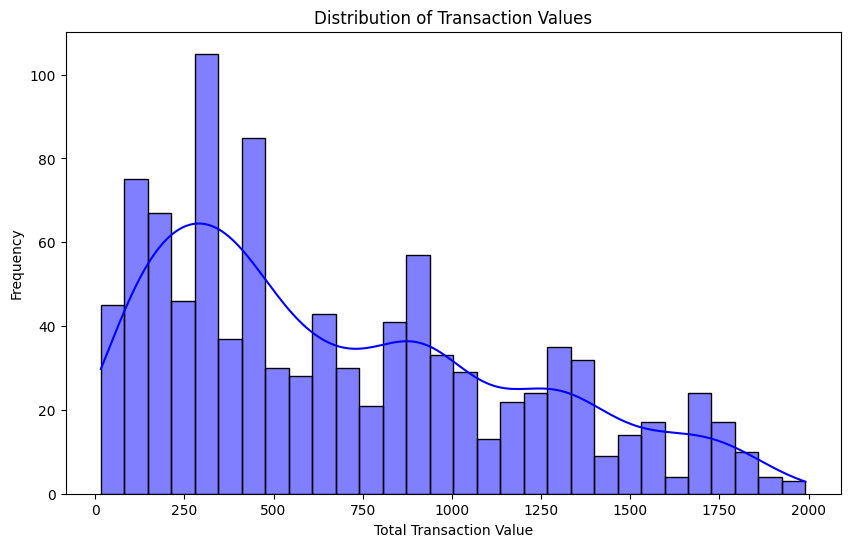


Top 5 Product Categories:
 Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64


<ipython-input-6-3e463f3d7621>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette="viridis")


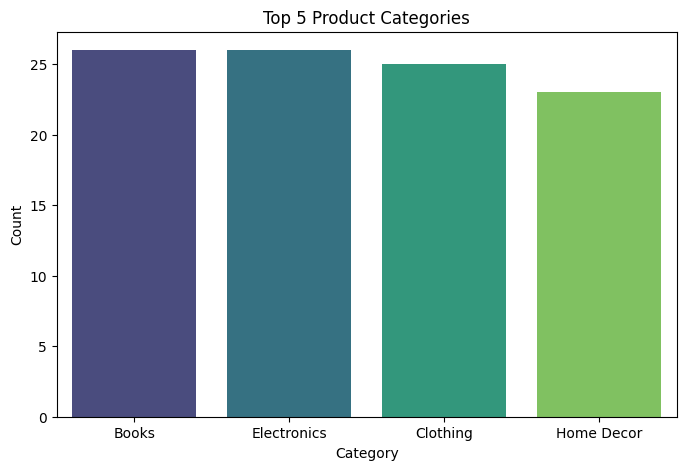


Top 5 Active Customers:
 CustomerID
C0109    11
C0156    11
C0141    10
C0175    10
C0065    10
Name: count, dtype: int64


<ipython-input-6-3e463f3d7621>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=customer_aov.index, y=customer_aov.values, palette="magma")


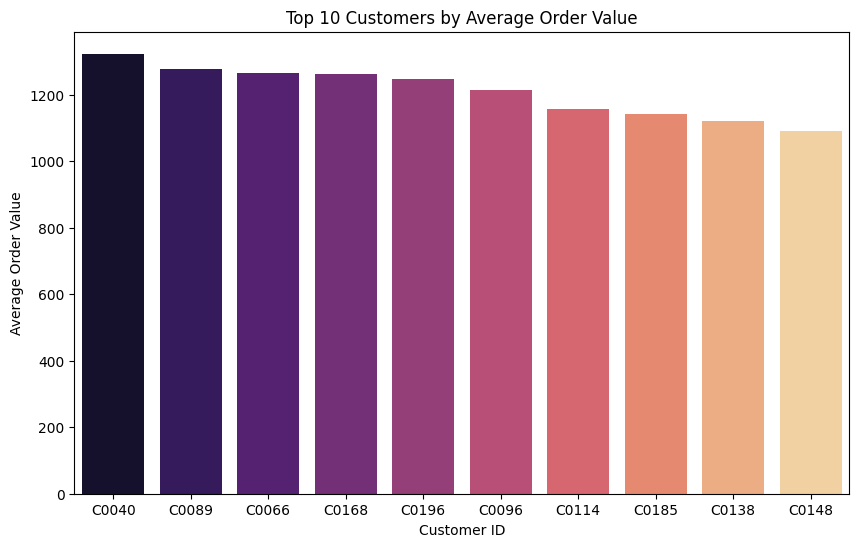

<ipython-input-6-3e463f3d7621>:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_revenue.index, y=category_revenue.values, palette="viridis")


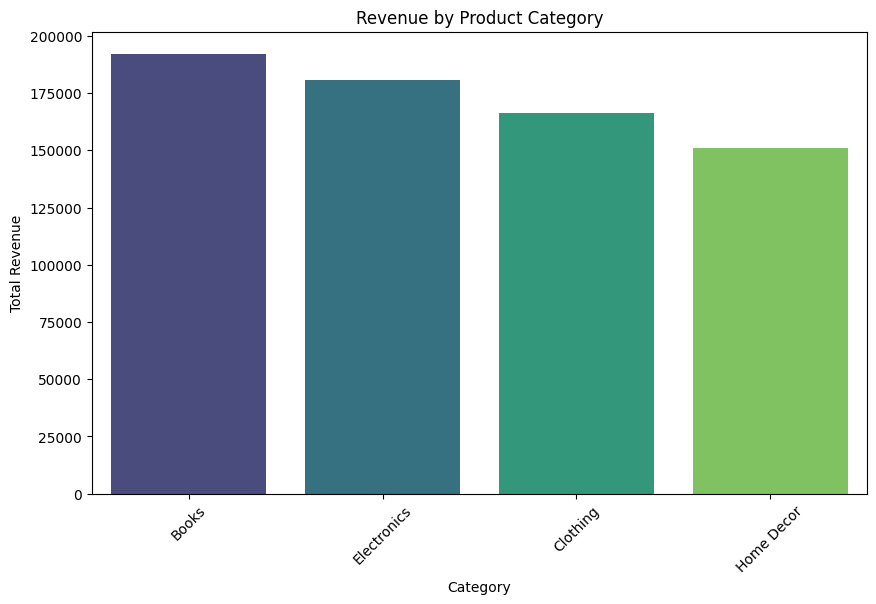

<ipython-input-6-3e463f3d7621>:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_counts.index, y=region_counts.values, palette="coolwarm")


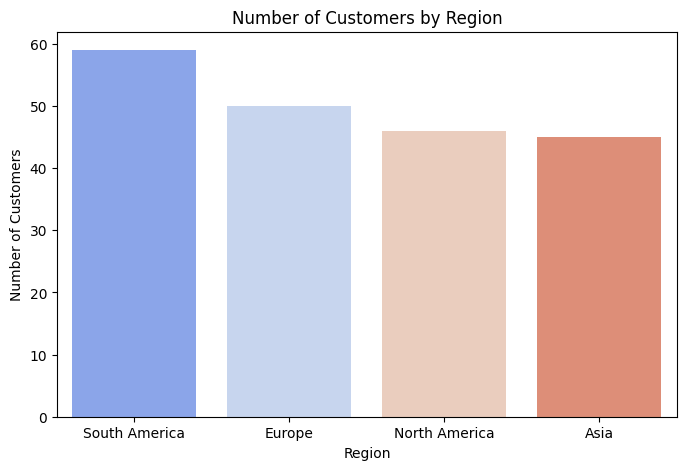

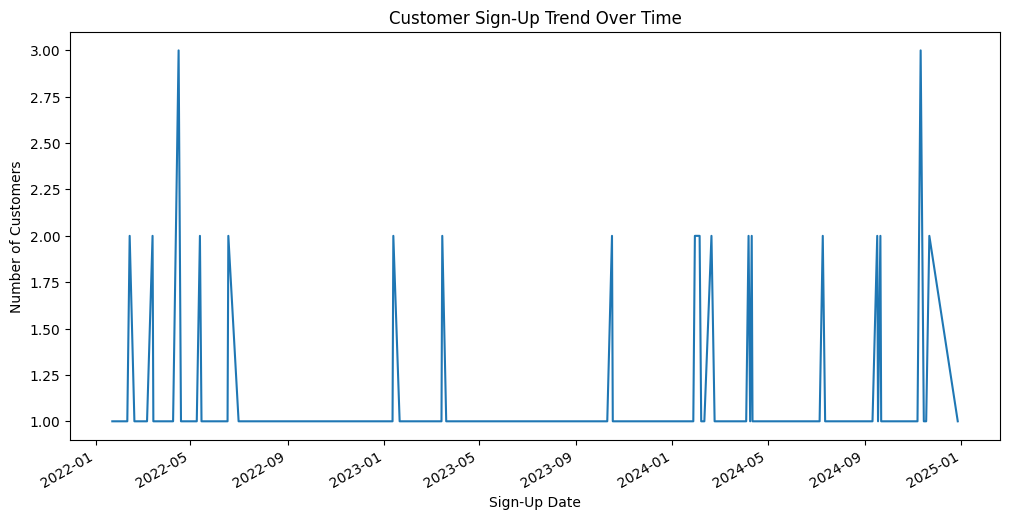

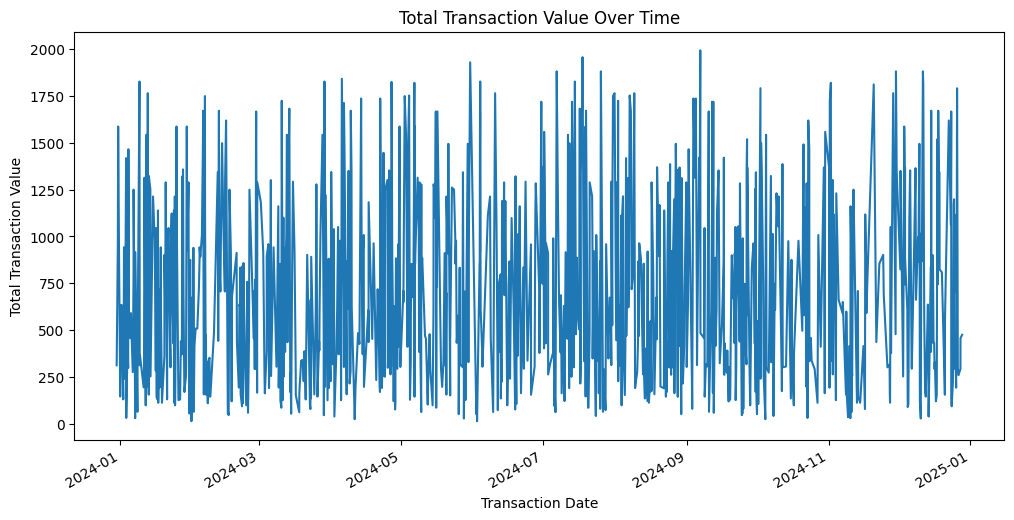

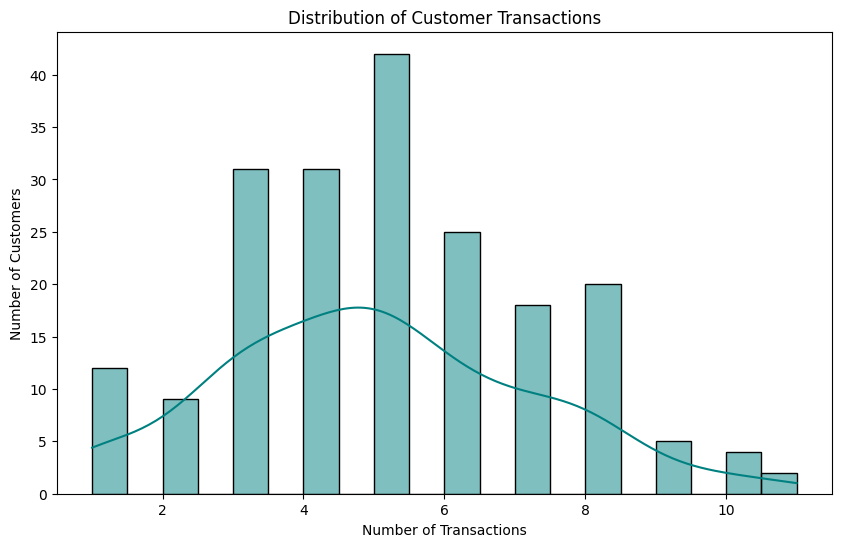

In [6]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv('/content/Customers.csv')
products = pd.read_csv('/content/Products.csv')
transactions = pd.read_csv('/content/Transactions.csv')

# Display the first few rows of each dataset
print("Customers Dataset:")
display(customers.head())

print("Products Dataset:")
display(products.head())

print("Transactions Dataset:")
display(transactions.head())

# Check for missing values
print("\nMissing Values:")
print("Customers:\n", customers.isnull().sum())
print("Products:\n", products.isnull().sum())
print("Transactions:\n", transactions.isnull().sum())

# Basic stats
print("\nStatistical Summary of Transactions:")
display(transactions.describe())

# Visualization: Distribution of Transactions
plt.figure(figsize=(10, 6))
sns.histplot(transactions['TotalValue'], bins=30, kde=True, color='blue')
plt.title("Distribution of Transaction Values")
plt.xlabel("Total Transaction Value")
plt.ylabel("Frequency")
plt.show()

# Insight 1: Most common product categories
top_categories = products['Category'].value_counts().head(5)
print("\nTop 5 Product Categories:\n", top_categories)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_categories.index, y=top_categories.values, palette="viridis")
plt.title("Top 5 Product Categories")
plt.ylabel("Count")
plt.xlabel("Category")
plt.show()

# Insight 2: Most active customers
active_customers = transactions['CustomerID'].value_counts().head(5)
print("\nTop 5 Active Customers:\n", active_customers)

# Calculate average order value (AOV)
customer_aov = transactions.groupby('CustomerID')['TotalValue'].mean().sort_values(ascending=False).head(10)

# Plot top customers by AOV
plt.figure(figsize=(10, 6))
sns.barplot(x=customer_aov.index, y=customer_aov.values, palette="magma")
plt.title("Top 10 Customers by Average Order Value")
plt.xlabel("Customer ID")
plt.ylabel("Average Order Value")
plt.show()

# Merge transactions with products to include categories
merged_data = pd.merge(transactions, products, on='ProductID', how='inner')

# Calculate revenue by category
category_revenue = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)

# Plot revenue by category
plt.figure(figsize=(10, 6))
sns.barplot(x=category_revenue.index, y=category_revenue.values, palette="viridis")
plt.title("Revenue by Product Category")
plt.xlabel("Category")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()

# Count customers by region
region_counts = customers['Region'].value_counts()

# Plot the distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=region_counts.index, y=region_counts.values, palette="coolwarm")
plt.title("Number of Customers by Region")
plt.xlabel("Region")
plt.ylabel("Number of Customers")
plt.show()

# Convert SignupDate to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])

# Plot signups over time
plt.figure(figsize=(12, 6))
customers['SignupDate'].value_counts().sort_index().plot()
plt.title("Customer Sign-Up Trend Over Time")
plt.xlabel("Sign-Up Date")
plt.ylabel("Number of Customers")
plt.show()

# Convert TransactionDate to datetime
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Plot transactions over time
plt.figure(figsize=(12, 6))
transactions.groupby('TransactionDate')['TotalValue'].sum().plot()
plt.title("Total Transaction Value Over Time")
plt.xlabel("Transaction Date")
plt.ylabel("Total Transaction Value")
plt.show()

# Count transactions per customer
customer_frequency = transactions['CustomerID'].value_counts()

# Plot distribution of customer transactions
plt.figure(figsize=(10, 6))
sns.histplot(customer_frequency, bins=20, kde=True, color='teal')
plt.title("Distribution of Customer Transactions")
plt.xlabel("Number of Transactions")
plt.ylabel("Number of Customers")
plt.show()




In [4]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Merge datasets
merged_data = pd.merge(transactions, customers, on='CustomerID', how='inner')
merged_data = pd.merge(merged_data, products, on='ProductID', how='inner')

# Pivot data for customer-product interaction matrix
interaction_matrix = merged_data.pivot_table(index='CustomerID', columns='ProductID', values='Quantity', fill_value=0)

# Calculate cosine similarity
similarity_matrix = cosine_similarity(interaction_matrix)
similarity_df = pd.DataFrame(similarity_matrix, index=interaction_matrix.index, columns=interaction_matrix.index)

# Find top 3 similar customers for the first 20 customers
lookalikes = {}
for customer_id in interaction_matrix.index[:20]:
    similar_customers = similarity_df[customer_id].sort_values(ascending=False)[1:4]
    lookalikes[customer_id] = list(zip(similar_customers.index, similar_customers.values))

# Save to CSV
# Save to CSV
import os

# Create the results directory if it doesn't exist
results_dir = '/content/results'  # Adjust path if needed
os.makedirs(results_dir, exist_ok=True)

# Save the lookalikes DataFrame to the directory
lookalikes_df.to_csv(f'{results_dir}/FirstName_LastName_Lookalike.csv', index=False)

print("Top 3 Lookalikes for first 20 customers saved at:", results_dir)





Top 3 Lookalikes for first 20 customers saved at: /content/results


Davies-Bouldin Index: 0.8650620583623065


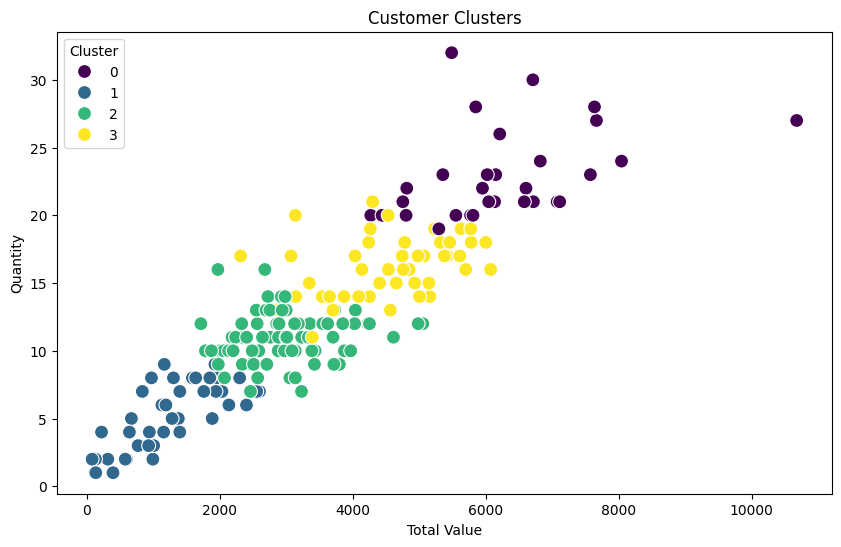

In [5]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt

# Prepare clustering data
clustering_data = transactions.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'TransactionID': 'count',
    'Quantity': 'sum'
}).reset_index()

scaler = StandardScaler()
clustering_scaled = scaler.fit_transform(clustering_data[['TotalValue', 'TransactionID', 'Quantity']])

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(clustering_scaled)
clustering_data['Cluster'] = clusters

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(clustering_scaled, clusters)
print(f"Davies-Bouldin Index: {db_index}")

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=clustering_data, x='TotalValue', y='Quantity', hue='Cluster', palette='viridis', s=100)
plt.title("Customer Clusters")
plt.xlabel("Total Value")
plt.ylabel("Quantity")
plt.legend(title='Cluster')
plt.show()
